In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

C:\Users\shiva\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv(r"C:\Users\shiva\Downloads\archive (2)\weather_classification_data.csv")

In [3]:
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


# identficatiion of missing values

In [4]:
df.isna().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [5]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


In [6]:
report=sweetviz.analyze(df)

                                             |                                             | [  0%]   00:00 ->…

In [7]:
report.show_html("eda report.html")

Report eda report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


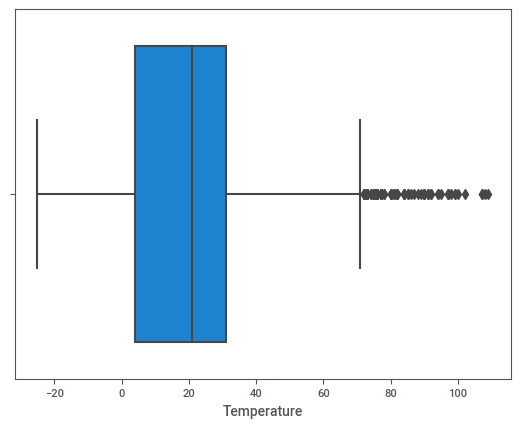

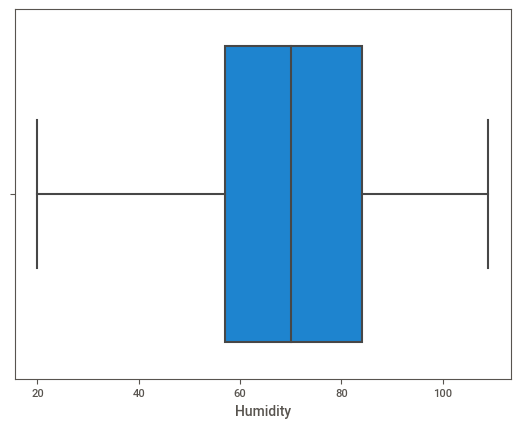

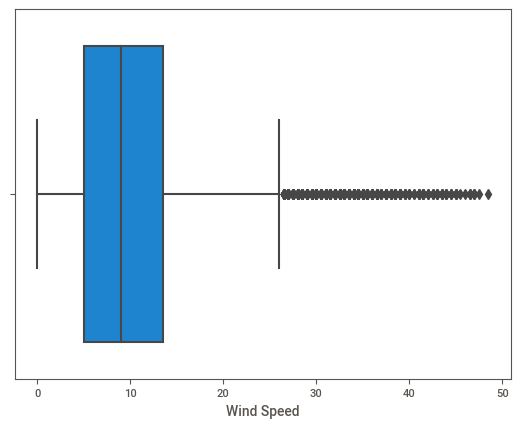

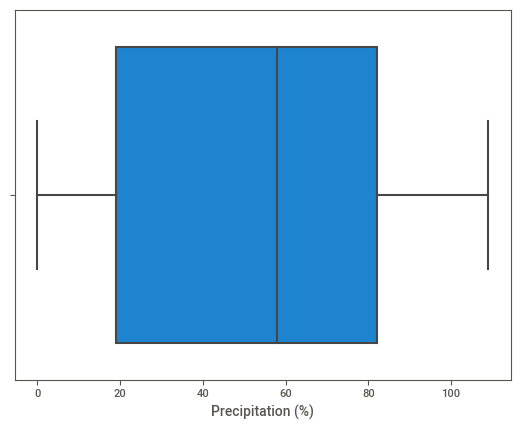

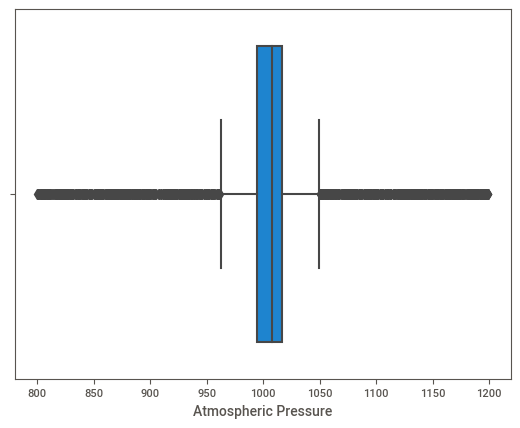

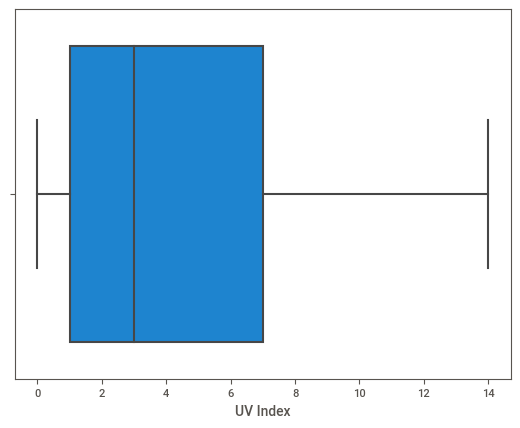

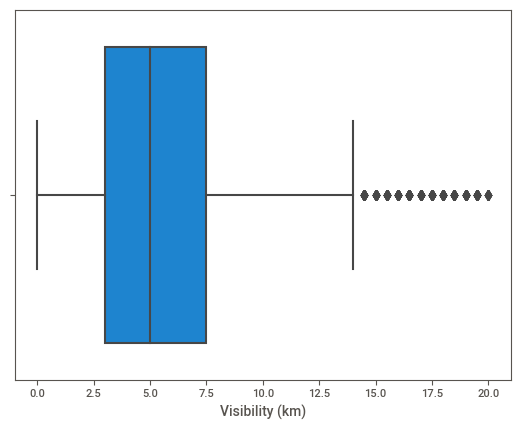

In [8]:
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df, x=i)
    plt.show()

<Axes: >

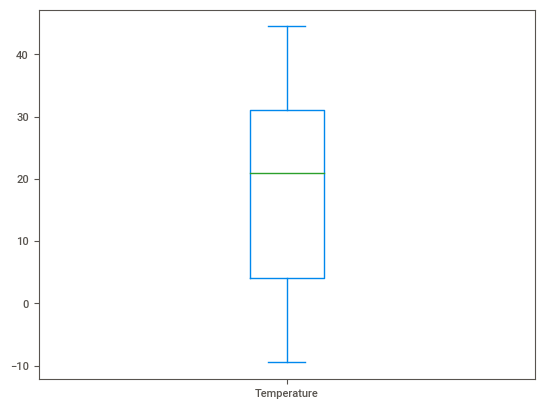

In [9]:
from feature_engine.outliers import Winsorizer
win=Winsorizer(capping_method="iqr",tail="both",fold=0.5)
df["Temperature"]=win.fit_transform(df[["Temperature"]])
df["Temperature"].plot(kind="box")

<Axes: >

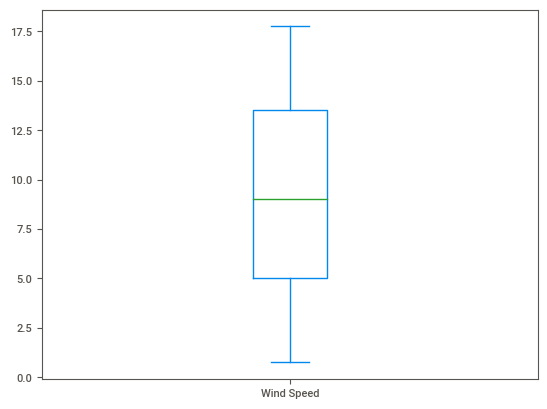

In [10]:
from feature_engine.outliers import Winsorizer
win=Winsorizer(capping_method="iqr",tail="both",fold=0.5)
df["Wind Speed"]=win.fit_transform(df[["Wind Speed"]])
df["Wind Speed"].plot(kind="box")

<Axes: >

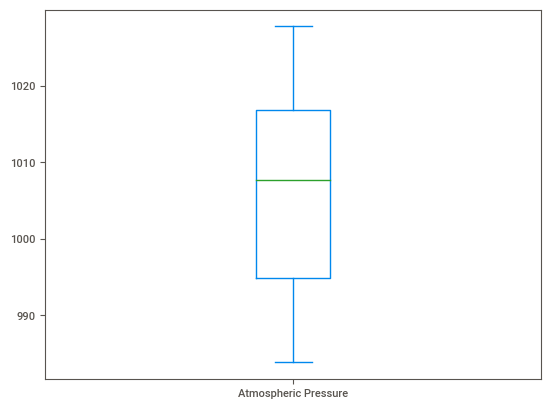

In [11]:
from feature_engine.outliers import Winsorizer
win=Winsorizer(capping_method="iqr",tail="both",fold=0.5)
df["Atmospheric Pressure"]=win.fit_transform(df[["Atmospheric Pressure"]])
df["Atmospheric Pressure"].plot(kind="box")

<Axes: >

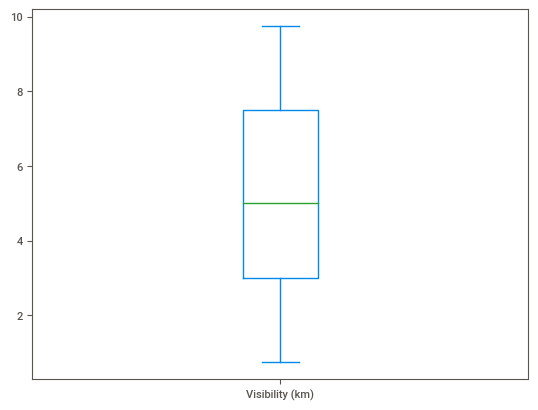

In [12]:
from feature_engine.outliers import Winsorizer
win=Winsorizer(capping_method="iqr",tail="both",fold=0.5)
df["Visibility (km)"]=win.fit_transform(df[["Visibility (km)"]])
df["Visibility (km)"].plot(kind="box")

In [13]:
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.50,82.0,partly cloudy,1010.82000,2,Winter,3.50,inland,Rainy
1,39.0,96,8.50,71.0,partly cloudy,1011.43000,7,Spring,9.75,inland,Cloudy
2,30.0,64,7.00,16.0,clear,1018.72000,5,Spring,5.50,mountain,Sunny
3,38.0,83,1.50,82.0,clear,1026.25000,7,Spring,1.00,coastal,Sunny
4,27.0,74,17.00,66.0,overcast,990.67000,1,Winter,2.50,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.50,71.0,overcast,1003.15000,1,Summer,1.00,mountain,Rainy
13196,-1.0,76,3.50,23.0,cloudy,1027.75875,1,Winter,6.00,coastal,Snowy
13197,30.0,77,5.50,28.0,overcast,1012.69000,3,Autumn,9.00,coastal,Cloudy
13198,3.0,76,10.00,94.0,overcast,984.27000,0,Winter,2.00,inland,Snowy


In [32]:
num=["Temperature","Humidity","Wind Speed","Precipitation (%)","UV Index","Visibility (km)"]
nomin=["Cloud Cover","Location"]
ordin=["Season"]


In [33]:
from sklearn.pipeline import Pipeline

In [43]:
numerical=Pipeline([("Mean Imputation",SimpleImputer()),
                    ("Scaling",StandardScaler())])
nominal=Pipeline([("Mode Imputation",SimpleImputer(strategy="most_frequent")),
                 ("enocding",OneHotEncoder(drop="first"))])
ordinal=Pipeline([("Mode Iputation",SimpleImputer(strategy="most_frequent")),
                 ("encoding",OrdinalEncoder())])

In [44]:
from sklearn.compose import ColumnTransformer

In [45]:
Preprocess=ColumnTransformer([
    ("numerical",numerical,num),
    ("nominal",nominal,nomin),
    ("ordinal",ordinal,ordin)])
Preprocess

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('Mean Imputation',
                                                  SimpleImputer()),
                                                 ('Scaling',
                                                  StandardScaler())]),
                                 ['Temperature', 'Humidity', 'Wind Speed',
                                  'Precipitation (%)', 'UV Index',
                                  'Visibility (km)']),
                                ('nominal',
                                 Pipeline(steps=[('Mode Imputation',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('enocding',
                                                  OneHotEncoder(drop='first'))]),
                                 ['Cloud Cover', 'Location']),
                                ('ordinal',
                                 Pipeline(steps=[('Mode Iputation',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding',
                                                  OrdinalEncoder())]),
                                 ['Season'])])

In [46]:
lr=Pipeline([("Preprocessing",Preprocess),
            ("model",LogisticRegression())])

In [47]:
X=df.drop("Weather Type",axis=1)
y=df["Weather Type"]

In [48]:
y

0         Rainy
1        Cloudy
2         Sunny
3         Sunny
4         Rainy
          ...  
13195     Rainy
13196     Snowy
13197    Cloudy
13198     Snowy
13199     Rainy
Name: Weather Type, Length: 13200, dtype: object

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=23)

In [51]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.8818181818181818

In [52]:
from sklearn.tree import DecisionTreeClassifier
dt=Pipeline([("Preprocessing",Preprocess),
            ("model",DecisionTreeClassifier())])
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
accuracy_score(y_test,y_pred)

0.8981060606060606

In [53]:
from sklearn.svm import SVC

In [56]:
sv=Pipeline([("Preprocessing",Preprocess),
             ("model",LogisticRegression())])
sv.fit(X_train,y_train)
y_pred=sv.predict(X_test)
accuracy_score(y_test,y_pred)

0.8818181818181818

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
knn=Pipeline([("Preprocessing",Preprocess),
             ("model",KNeighborsClassifier())])
knn.fit(X_train,y_train)
y_pred=sv.predict(X_test)
accuracy_score(y_test,y_pred)

0.8818181818181818

In [59]:
import pickle

In [60]:
pickle.dump(dt,open("dt.pkl","wb"))
model=pickle.load(open("dt.pkl","rb"))